In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [8]:
def EA(Mu, Lambda,n,function, plus,x,y):

    chromosome_length = n
    starting_population = Random_Population(x,y,Mu,n)
    number_of_offspring = Lambda
    number_of_iterations = 500
    population_size = Mu
    parents_objective_values = np.zeros(population_size)
    current_population = starting_population
    parents = current_population
    fitness_value_mean = []
    
    for i in range(Mu):
        parents_objective_values[i] = function(current_population[i,0],n)

    objective_values = parents_objective_values
    max = objective_values.min()

    for t in range(number_of_iterations):

 
        ppdb = objective_values.max() - objective_values
        if ppdb.sum() > 0:
            ppdb = ppdb / ppdb.sum()
        else:
            ppdb = np.ones(Mu) / population_size


        parent_indices = np.random.choice(population_size, number_of_offspring, True, ppdb).astype(np.int64)

        

        children_population = np.zeros((number_of_offspring, 2,chromosome_length), dtype=np.float64)

        for i in range(int(number_of_offspring/2)):
            children_population[2*i], children_population[2*i+1] = current_population[parent_indices[2*i]].copy(), current_population[parent_indices[2*i+1]].copy()
            if np.mod(number_of_offspring, 2) == 1:
                children_population[-1, :] = current_population[parent_indices[-1].copy()]


        #mutating children
        for i in range(number_of_offspring):
                children_population[i] = mutation(children_population[i].copy(),n)




        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = function(children_population[i,0,:],n)

        if plus == True:
            objective_values = np.hstack([objective_values.copy(), children_objective_values.copy()])
            
            I = np.argsort(objective_values)
          
            I = I[:Mu]
            
            objective_values = objective_values[I]
            current_population = np.vstack([parents.copy(), children_population.copy()])
            parents = current_population[I].copy()
            current_population = parents.copy()
  


        else:
            objective_values = children_objective_values
            I = np.argsort(objective_values)
            I = I[:Mu]
            objective_values = objective_values[I]

            current_population = children_population[I]
            
        print(objective_values.min(), objective_values.mean(), objective_values.std())
  



def mutation(P,d):
    tz = 4/np.sqrt((2*np.sqrt(d)))
    t = 4/np.sqrt(2*d)
    n = P.shape[1]
    e_0 = np.random.normal(0,tz)
    randoms = np.random.normal(0,t,n)  
    P[1,:] = P[1,:] * np.exp(randoms + e_0)
    randoms = np.random.normal(0,P[1,:],n)
    P[0,:] = P[0,:] + randoms
    
    return P 


def Random_Population(x,y,Mu,d):
    lin = np.linspace(x,y,1000)
    X = np.zeros((Mu,2,d))
    for x in range(Mu):
        X[x,0] = np.random.choice(lin, d)
        X[x,1] = np.random.uniform(0,1,size=d)
    return X    

def Rastrigin_function(x,n):
    s = np.sum(x**2-10*np.cos(2*np.pi*x))
    y = 10*n + s
    return y


In [ ]:


def Schewel_function(x,n):
    s = np.sum(-x*np.sin(np.sqrt(np.abs(x))));
    return 418.9829*n+s;




def Sum_Square(x,n): # - 10,10
    s = 0
    for i in range(n):
        s += i*x[i]**2; 

    return s


def Sphere_function(x,n): #-5.12, 5.12
    return np.sum(x**2)

def Dixon_function(x,n): # -10,10
    s=0
    for i in range(1,n):
        s += i*(2*(x[i]**2) - x[i-1])**2
    s += (x[0]-1)**2
    return s

def Zakharov_function(x,n): # -5,10
    s1= 0
    s2=0
    for i in range(n):
        s1 += x[i]**2
        s2 += 0.5*i*x[i]
    return s1+s2**2+s2**4;


Zakharov_Results = {}
Zakharov_Results[10]= list(EA(500,1500,10,Zakharov_function,True,-5,10))
Zakharov_Results[50]= list(EA(500,1500,50,Zakharov_function,True, -5,10))
Zakharov_Results[100]= list(EA(500,1500,100,Zakharov_function,True, -5, 10))



In [ ]:
Dixon_Results = {}
Dixon_Results[10] = list(EA(500,1500,10,Dixon_function,True,-10,10))
Dixon_Results[50] = list(EA(500,1500,50,Dixon_function,True,-10,10))
Dixon_Results[100] = list(EA(500,1500,100,Dixon_function,True,-10,10))

In [ ]:

Sum_Square_Results = {}
Sum_Square_Results[10] = list(EA(500,1500,10,Sum_Square,True, -10,10))
Sum_Square_Results[50] = list(EA(500,1500,50,Sum_Square,True, -10,10))
Sum_Square_Results[100] = list(EA(500,1500,100,Sum_Square,True, -10,10))


In [ ]:
Rastrigin_Results = {}
Rastrigin_Results[50] = list(EA(500,1500,50,Rastrigin_function, True,-5.12,5.12))
Rastrigin_Results[10] = list(EA(500,1500,10,Rastrigin_function, True,-5.12,5.12))
Rastrigin_Results[100] = list(EA(500,1500,100,Rastrigin_function, True,-5.12,5.12))

In [ ]:
Sphere_Results = {}
Sphere_Results[10] = list(EA(500,1500,10,Sphere_function,True,-5.12,5.12))
Sphere_Results[50] = list(EA(500,1500,50,Sphere_function,True,-5.12,5.12))
Sphere_Results[100] = list(EA(500,1500,100,Sphere_function,True,-5.12,5.12))


In [ ]:
MU_150_Results = {}
MU_150_Results["Sphere"] = list(EA(150,500,50,Sphere_function,True,-5.12,5.12))
MU_150_Results["Rastrigin"] = list(EA(150,500,50,Rastrigin_function, True,-5.12,5.12))
MU_150_Results["Squares"] = list(EA(150,500,50,Sum_Square,True, -10,10))
MU_150_Results["Dixon"] = list(EA(150,500,50,Dixon_function,True,-10,10))
MU_150_Results["Zakharov"] = list(EA(150,500,50,Zakharov_function,True, -5,10))



In [ ]:
import pandas as pd
Names = ["Sphere", "Rstrigin", "Squares", "Dixon", "Zakharov"]
Numbers = ["10",  "50", "100"]
Variables = ["Best of Gen0", "Best of Last Gen", "Mean of Last Gen", "Variance of last Gen"]


In [ ]:
df = pd.DataFrame.from_dict(MU_150_Results, orient = 'index', columns=Variables)


df_2 = pd.DataFrame.from_dict(Zakharov_Results, orient='index', columns=Variables)

df_3 = pd.DataFrame.from_dict(Sphere_Results, orient='index', columns=Variables)

df_4 = pd.DataFrame.from_dict(Dixon_Results, orient='index', columns=Variables)


df_5 = pd.DataFrame.from_dict(Sum_Square_Results, orient='index', columns=Variables)

df_6 = pd.DataFrame.from_dict(Rastrigin_Results, orient='index', columns=Variables, dtype= np.float64)


In [ ]:
pd.set_option("display.precision", 20)
print("Results of functions with d=50, Mu=150, Lambda = 500")
df

Results of functions with d=50, Mu=150, Lambda = 500


,Best of Gen0,Best of Last Gen,Mean of Last Gen,Variance of last Gen
Sphere,2.74662598002206436831e+02,0.02821865797355613964,0.02822259702760033379,0.00000104911182996271
Rastrigin,7.77591162665626143280e+02,258.68796023433947084413,258.68796089866674492441,0.00000018283157155213
Squares,2.49294324354384480102e+04,0.29841613207227962734,0.29875244465369199531,0.00007307753004677377
Dixon,5.40420189426133502275e+06,1.00149656374249840241,1.00151177144367187211,0.00000375408369950946
Zakharov,2.50096662077372968197e+07,152.02703248758174936484,152.05233876069198117875,0.00616404767752559875


In [ ]:
print("Zakharov function results for different D, Mu=500, Lambda = 1500")
df_2

Zakharov function results for different D, Mu=500, Lambda = 1500


,Best of Gen0,Best of Last Gen,Mean of Last Gen,Variance of last Gen
10,9.02241897351289310336e+01,3.08998623363074361684e-119,6.94293202644551427665e-119,1.05953689387055221535e-119
50,2.66697378997733116150e+10,3.56217921705528155485e+01,3.56276275975858141010e+01,1.62198595566369081072e-03
100,1.86951563073394262695e+12,3.37545867039910206131e+02,3.38609790117506690876e+02,2.37948296831120564843e-01


In [ ]:
print("Sphere function results for different D, Mu=500, Lambda = 1500")
df_3

Sphere function results for different D, Mu=500, Lambda = 1500


,Best of Gen0,Best of Last Gen,Mean of Last Gen,Variance of last Gen
10,27.90034146098049205875,6.14363387945793958267e-175,1.43312350735491873822e-174,0.00000000000000000000
50,271.23865406948488043781,3.69177782690860521037e-04,3.74268233454431921859e-04,0.00000071478689670308
100,687.09995920565211235953,4.30201913290958728453e+01,4.30387416033375842517e+01,0.00375975358651981038


In [ ]:
print("Dixon function results for different D, Mu=500, Lambda = 1500")
df_4

Dixon function results for different D, Mu=500, Lambda = 1500


,Best of Gen0,Best of Last Gen,Mean of Last Gen,Variance of last Gen
10,1.61608692281755047588e+04,1.60237371373018022974e-31,1.60237371373018022974e-31,0.00000000000000000000
50,4.91944750558133516461e+06,5.29078252077582855684e-01,5.29409296841598875361e-01,0.00006961826214427517
100,1.79378394762319810688e+07,5.92544534164119454545e+02,5.93728346259157092391e+02,0.24838563781623992921


In [ ]:
print("Sum of Squares function results for different D, Mu=500, Lambda = 1500")
df_5

Sum of Squares function results for different D, Mu=500, Lambda = 1500


,Best of Gen0,Best of Last Gen,Mean of Last Gen,Variance of last Gen
10,269.56175394613831031165,9.91442615505320518489e-206,2.11555986253076568169e-205,0.00000000000000000000
50,25192.37726214703798177652,2.76288325354068463324e-02,2.76289938663371210936e-02,0.00000003307148445752
100,113003.18997676357685122639,1.44511802389160629900e+03,1.44636800198001697026e+03,0.27016295325307465580


In [ ]:
print("Rastrigin function results for different D, Mu=500, Lambda = 1500")
df_6

Rastrigin function results for different D, Mu=500, Lambda = 1500


,Best of Gen0,Best of Last Gen,Mean of Last Gen,Variance of last Gen
10,9.02241897351289310336e+01,3.08998623363074361684e-119,6.94293202644551427665e-119,1.05953689387055221535e-119
50,2.66697378997733116150e+10,3.56217921705528155485e+01,3.56276275975858141010e+01,1.62198595566369081072e-03
100,1.86951563073394262695e+12,3.37545867039910206131e+02,3.38609790117506690876e+02,2.37948296831120564843e-01


Text(0.5, 1.0, 'Rastrigin Results')

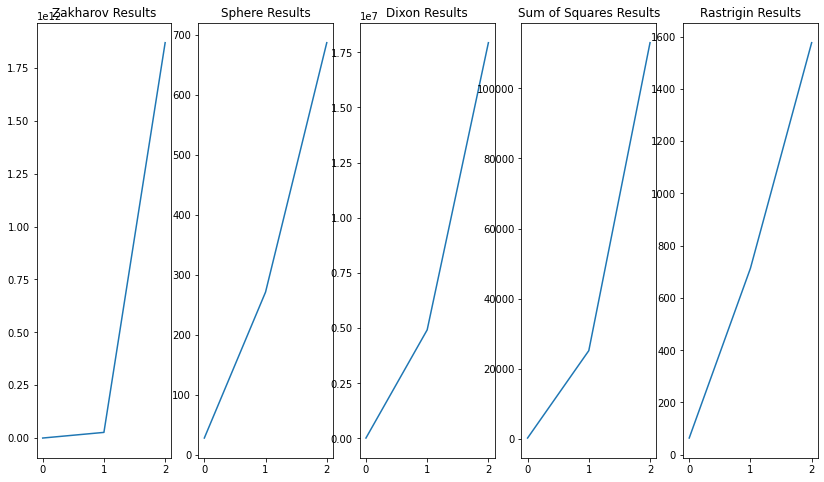

In [ ]:
names = [Zakharov_Results, Sphere_Results, Dixon_Results, Sum_Square_Results, Rastrigin_Results]
Results = []
for x in names:
    Results.append(x[10][0])
    Results.append(x[50][0])
    Results.append(x[100][0])

figs, axs = plt.subplots(1,5, figsize=(14,8))
axs[0].plot(Results[:3])
axs[0].set_title("Zakharov Results")
axs[1].plot(Results[3:6])
axs[1].set_title("Sphere Results")
axs[2].plot(Results[6:9])
axs[2].set_title("Dixon Results")
axs[3].plot(Results[9:12])
axs[3].set_title("Sum of Squares Results")
axs[4].plot(Results[12:])
axs[4].set_title("Rastrigin Results")


In [ ]:
EA(1000, 2000, 50, Rastrigin_function, True, -5.12,5.12)